In [199]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
#Load the train and test dataset in pandas Dataframe
train=pd.read_csv("E:/Placement courses/ML Projects/Bigmart/train.csv")
test=pd.read_csv("E:/Placement courses/ML Projects/Bigmart/test.csv")

In [201]:
#check no of rows and columns in train dataset
train.shape

(8523, 12)

In [202]:
#Print the name of Columns in train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [203]:
#check the number of rows and columns in test dataset
test.shape

(5681, 11)

In [204]:
#Print the name of columns in test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [205]:
#Combine test and train into onew file to perform Exploratory data Analysis
train["source"]="train"
test["source"]="test"
data=pd.concat([train, test], ignore_index=True,sort=False)
print(data.shape)

(14204, 13)


In [206]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [207]:
#Describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [208]:
#checking for missing value
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [209]:
#The column Item_weight has 2439 missing values and the Outlet_size has around 4016.
#Item_Outlet_Sales has 5681 missing values , which we will predict using the model.

In [210]:
#Print the unique values in the Item_Fat_Content column , where there are only two unique types of fat content in items:lowfat and regular
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [211]:
#Print the unique values in the Outlet_Establishment_Year column, where the data ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [212]:
#Calculate the OutLet_Age
data["Outlet_Age"]=2018-data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [213]:
#Unique values in Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [214]:
#Printing the count value of Item_Fat_Content column
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [215]:
#Print the count value of Outlet_Size
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [216]:
#Use the mode function to find out the most common value in Outlet_Size
print(data["Outlet_Size"].mode()[0])
#Two variables with missing values - Item_weight and Outlet_Size
#Replacing missing values in Outlet_Size with value "medium"
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

Medium


In [217]:
#Replace missing values in Item_Weight with the mean weight
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

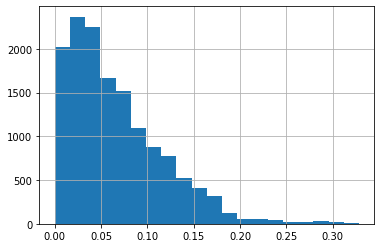

In [218]:
#Plot a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

In [219]:
#Decting outliers
#An outliers is a data point that lies outside the overall pattern in distribution 
#A commonly used rule states  that a data point is an outlier if it is more than 1.5IQR above the third quartile or below the first quartile
#Using this , one can remove the outliers and output the resulting data in fill_data variable
#calculate the first quantile for Item_Visibility
Q1 =data["Item_Visibility"].quantile(0.25)

In [220]:
#Calculate the second quantile 
Q3=data["Item_Visibility"].quantile(0.75)

In [221]:
#Calculate the interquartile range (IQR)
IQR= Q3-Q1

In [222]:
#Now that IQR range is know remove the outliers from the data
#The resulting data is stored in fill_data variable 
fill_data=data.query("(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)")

In [223]:
#Display the data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [224]:
#Check the shape of the recruiting dataset without the outliers
fill_data.shape

(13943, 14)

In [225]:
#Shape of the original dataset is 14204 rows and 14 columns with outliers
data.shape

(14204, 14)

In [226]:
#Check the shape of resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [227]:
#shape of original dataset is
data.shape

(14204, 14)

In [228]:
#Assign fill_data dataset to data Dataframe;
data=fill_data
data.shape

(13943, 14)

In [229]:
#Modify Item_Visibility by converting the numerical values into the categories Low Visibility , Visibility, and High Visibility
data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000, 0.065, 0.13, 0.2], labels=["Low Viz", "Viz", "High Viz"])

In [230]:
#Print the count of Item_Visibility_bins
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [231]:
#Replacing null value with low visibility
data["Item_Visibility_bins"]=data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex=True)

In [232]:
#We Found types and differences in representation in categoriesof Item_Fat_Content variable
#This can be corrected using 
#Replace all other representation of low fat with low
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

In [233]:
#Replace all all representation of reg with regular
data["Item_Fat_Content"] =data["Item_Fat_Content"].replace("reg", "Regular")

In [234]:
#Print unique fat count values 
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [235]:
#Code all categorical variables as numeric  using "LabelEncoder" from sklearn's preprocessing module
#Initialize the label encoder
le=LabelEncoder()


In [236]:
#Transform Item_Fat_Content
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])

In [237]:
#Transform Item_Visibility_bins
data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])

In [238]:
#Transform Outlet_Size
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])

In [239]:
#Transform  Outlet_Location_Type
data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])

In [240]:
#Print the unique values of Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [241]:
#Create dummies for Outlet_Type
dummy=pd.get_dummies(data["Outlet_Type"])
dummy.head()


,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [242]:
#Explore the column Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
5        FDP36
6        FDO10
7        FDP10
8        FDH17
9        FDU28
10       FDY07
11       FDA03
12       FDX32
13       FDS46
14       FDF32
15       FDP49
16       NCB42
17       FDP49
18       DRI11
19       FDU02
20       FDN22
21       FDW12
22       NCB30
23       FDC37
24       FDR28
25       NCD06
26       FDV10
27       DRJ59
28       FDE51
29       FDC14
         ...  
14173    FDC10
14174    FDD23
14175    FDP32
14176    FDO31
14177    FDQ57
14178    FDX32
14179    FDC39
14180    FDU55
14181    FDL45
14182    DRK37
14183    FDK22
14184    DRG37
14185    FDK22
14186    DRH36
14187    DRC36
14188    DRE03
14189    FDF34
14190    FDZ22
14192    FDN31
14193    FDO03
14194    FDA01
14195    NCH42
14196    FDF46
14197    DRL35
14198    FDW46
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [243]:
#As there are multiple values of food , nonconsumable items, and drinks with different numbers , combine the item type
data["Item_Identifier"].value_counts()

DRD25    10
FDS55    10
FDB17    10
FDF58    10
FDE33    10
NCK18    10
FDM44    10
FDE26    10
FDD58    10
FDJ33    10
NCU29    10
DRH03    10
NCA29    10
DRI03    10
NCV41    10
FDA38    10
FDB60    10
NCJ06    10
FDC37    10
FDL36    10
FDY40    10
FDM51    10
FDC21    10
FDZ48    10
FDD56    10
NCM43    10
FDQ11    10
NCC07    10
FDX31    10
FDT37    10
         ..
FDT01     8
FDY27     8
FDG41     8
FDG33     8
FDR08     8
FDV02     8
NCI43     8
NCX17     8
FDB56     8
NCC19     8
FDP13     7
FDH58     7
FDL50     7
FDS22     7
FDI46     7
FDA10     7
FDX49     7
FDM10     7
FDL32     7
DRN11     7
DRF51     7
FDZ60     7
NCQ17     7
FDM52     7
FDR51     7
NCL42     7
FDO33     7
FDG21     7
NCW54     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [244]:
#As multiple categories are present in Item_Identifier, reduce this by mapping 
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({'FD': 'Food',
                                                          'NC': 'Non-Consumable',
                                                          'DR': 'Drink'})

In [245]:
#Only three categories are present in an Item_Type_Combined column.
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drink             1300
Name: Item_Type_Combined, dtype: int64

In [246]:
#Perform one-hot encoding  for all columns as the model works an numerical values and not an categorical values.
data=pd.get_dummies(data, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [247]:
data.shape

(13943, 26)

In [248]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [249]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types

data.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)


#Divide the dataset created earlier into train and test datasets
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]

#Drop unnecessary columns
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

#Export modified versions of the files
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [250]:
#Read the train _modified.csv and test_modified.csv dataset
train2=pd.read_csv("train_modified.csv")
test2=pd.read_csv("test_modified.csv")

In [271]:
#print the data types of train2 column
train2.dtypes


Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drink               int64
Item_Type_Combined_Food                int64
Item_Type_

In [272]:
#Drop the irrelevant variables from train2 dataset
#Create the independent variable x_train and dependent variable y_train
X_train=train2.drop(["Item_Outlet_Sales","Outlet_Identifier", "Item_Identifier"], axis=1)
y_train=train2.Item_Outlet_Sales

In [273]:
#Drop those irrelevant variable from test2 dataset
X_test = test2.drop({"Outlet_Identifier", "Item_Identifier"}, axis=1)

In [274]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
5,9.800000,0.063817,117.1492,21,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
6,19.350000,0.082602,50.1034,9,2,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
7,12.792854,0.015782,81.0592,33,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0
8,6.305000,0.123365,95.7436,16,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
9,5.985000,0.005698,186.8924,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [275]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [276]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [277]:
#Import sklearn Libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [278]:
#Create a train and test split
xtrain, xtest, ytrain, ytest= model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [279]:
#Fit linear regression to the training dataset
lin=LinearRegression()

In [280]:
lin.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
#Find the coefficient and intercept of the line 
#Use strain and ytrain for linear regression
print(lin.coef_)
lin.intercept_

[-1.92692654e+00 -3.32746294e+02  1.58826212e+01 -3.19549640e+01
 -1.41755050e+01 -1.45901761e+00  1.45901761e+00  1.88878689e+02
  4.79867957e+01 -2.36865485e+02  5.39642616e+02 -3.11411308e+02
 -2.28231308e+02 -1.63576909e+03 -1.25872012e+02 -3.48803423e+02
  2.11044453e+03  8.83932211e+00  3.46875666e+01 -4.35268887e+01]


955.4681471908987

In [282]:
#Predict the test set results of training data
predictions=lin.predict(xtest)
predictions

array([2070.25767998, 3705.69772   , 2962.46996681, ..., 3533.89305865,
       3477.22169198, 1241.7263815 ])

In [283]:
import math

In [284]:
#Find the RMSE for the model
print(math.sqrt(mean_squared_error(ytest, predictions)))

1126.407106641178


In [285]:
#Predict the column Item_Outlet_Sales of test dataset
y_sales_pred = lin.predict(X_test)
y_sales_pred


array([1789.6058103 , 1594.72524585, 1837.40378278, ..., 1823.78563072,
       3615.91286916, 1276.90636874])

In [286]:
test_predictions=pd.DataFrame({
    'Item_Identifier': test2['Item_Identifier'],
    'Outlet_Identifier': test2['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_pred
}, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet', 'Item_Outlet_Sales']
)

In [287]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet,Item_Outlet_Sales
0,FDW58,OUT049,NaN,1789.605810
1,FDW14,OUT017,NaN,1594.725246
2,NCN55,OUT010,NaN,1837.403783
3,FDQ58,OUT017,NaN,2676.850457
4,FDY38,OUT027,NaN,5126.989630
5,FDH56,OUT046,NaN,1961.677898
6,FDL48,OUT018,NaN,509.590768
7,FDC48,OUT027,NaN,2739.705223
8,FDN33,OUT045,NaN,1530.148436
9,FDA36,OUT017,NaN,3188.632466
